In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#Added so we can deal with NaN values

kidney_disease_data_frame = pd.read_csv("D:/datasets/kidney_disease.csv")

#EXTRA EDIT: Removing id column because it does not have data, just id numbers
kidney_disease_data_frame = kidney_disease_data_frame.drop(columns=['id'], errors='ignore')
kidney_disease_data_frame['classification'] = kidney_disease_data_frame['classification'].str.strip()


#Including all columns except the last.
feature_matrix = kidney_disease_data_frame.drop(columns=['classification'])

#EXTRA EDIT: Changing strings into number so KNN model can use all the data
feature_matrix = pd.get_dummies(feature_matrix, drop_first=True)

#Making labels = last column
target_labels = kidney_disease_data_frame['classification']


model_features_train, model_features_test, model_labels_train, model_labels_test = train_test_split(feature_matrix, target_labels, test_size= 0.3, random_state=69)

#EXTRA EDIT: Replacing null values with median of column to retain as much data as possible instead of dropping row.
imputer = SimpleImputer(strategy='median')
model_features_train = imputer.fit_transform(model_features_train)
model_features_test = imputer.transform(model_features_test)


In [60]:
from sklearn.neighbors import KNeighborsClassifier


number_of_neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors=number_of_neighbors)

#Fitting the model to the training set
fitted_knn_model = knn_model.fit(model_features_train, model_labels_train)

# Testing the model with the unseen test features
predicted_labels = knn_model.predict(model_features_test)


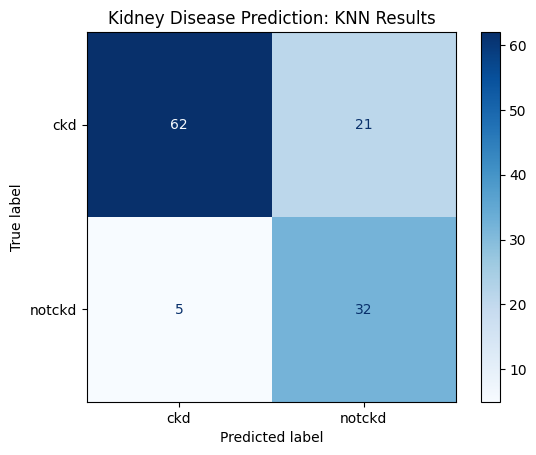

In [61]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_confusion_matrix = confusion_matrix(model_labels_test, predicted_labels, labels= knn_model.classes_)

display = ConfusionMatrixDisplay(
    confusion_matrix=model_confusion_matrix,
    display_labels=knn_model.classes_
)

display.plot(cmap='Blues')
plt.title("Kidney Disease Prediction: KNN Results")
plt.show()


In [62]:
# What True Positive, True Negative, False Positive, and False Negative mean in the context of kidney disease prediction:


# True Positives are the people that the model correctly identified as having Kidney disease
# True Negatives are the people that the model correctly identified as not having Kidney disease
# False Positives are the people that the model incorrectly identified as having Kidney disease, meaning they do not have it.
# False Negatives are the people that the model incorrectly identified as having Kidney disease, meaning they do, in fact, have it.

In [58]:
# Calculating: Accuracy, Precision, Recall, and f-1 Score
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

#Computing Accuracy
accuracy_of_model = accuracy_score(model_labels_test, predicted_labels)
print(f"Model Accuracy: {round(accuracy_of_model, 4)}")

#Computing Precision
precision_of_model = precision_score(model_labels_test, predicted_labels, pos_label='ckd')
print(f"Model Precision: {round(precision_of_model,4)}")

#Computing Recall
recall_of_model = recall_score(model_labels_test, predicted_labels, pos_label='ckd')
print(f"Model Recall Score: {round(recall_of_model, 4)}0")

#Computing f1 score
f1_score_of_model = f1_score(model_labels_test, predicted_labels, pos_label='ckd')
print(f"Model f-1 Score: {round(f1_score_of_model, 4)}")

# ROUNDED TO THE FOURTH PLACE FOR AESTHETICS

Model Accuracy: 0.7833
Model Precision: 0.9254
Model Recall Score: 0.7470
Model f-1 Score: 0.8267


In [59]:
# Why might accuracy not be enough alone?
# In the case that one outcome is much more common than another, accuracy may be misleading. The model may fail to find cases for the rarer outcome.

# Which metric is more important?
# In medical situations like this one, recall is very important as tells us the proportion of positive cases that were successfully
#identified. This is especially important in medical situations as a false negative could mean overlooking a fatal situation.